**APPENDIX E**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [ ]:
df = pd.read_csv('Aotizhongxin1 - Copy (3) - Copy.csv')
# out of 43824 samples, there are 2067 missing pm2.5 values
df = df.dropna()
print(df.head(6))
# shuffle the data
df = df.sample(frac=1)
print(df.head(6))

   No  year  month  day  hour  PM2.5  ...    O3  TEMP    PRES  DEWP  RAIN  WSPM
0   1  2013      3    1     0    4.0  ...  77.0  -0.7  1023.0 -18.8   0.0   4.4
1   2  2013      3    1     1    8.0  ...  77.0  -1.1  1023.2 -18.2   0.0   4.7
2   3  2013      3    1     2    7.0  ...  73.0  -1.1  1023.5 -18.2   0.0   5.6
3   4  2013      3    1     3    6.0  ...  72.0  -1.4  1024.5 -19.4   0.0   3.1
4   5  2013      3    1     4    3.0  ...  72.0  -2.0  1025.2 -19.5   0.0   2.0
5   6  2013      3    1     5    5.0  ...  66.0  -2.2  1025.6 -19.6   0.0   3.7

[6 rows x 16 columns]
          No  year  month  day  hour  ...  TEMP    PRES  DEWP  RAIN  WSPM
21520  21521  2015      8   14    16  ...  31.3   998.5  12.6   0.0   2.2
26273  26274  2016      2   28    17  ...   2.8  1027.5 -23.9   0.0   5.7
112      113  2013      3    5    16  ...  13.2  1007.1  -7.0   0.0   2.0
26267  26268  2016      2   28    11  ...   4.3  1025.0 -14.0   0.0   3.0
6519    6520  2013     11   27    15  ...  -0.7

In [ ]:
#only take one sample a day in order to get rid of repeated data
df1 = df[df.hour == 12]
print(df1.head(6))
y = np.array(df1['PM2.5'])
x = np.array(df1[['TEMP','PRES', 'WSPM','PM10','SO2','NO2','CO','O3','RAIN']])

print(y.shape)
n = y.shape[0]
#y = y.reshape(n,1)
print(y.shape)

#a = np.ones((n,1))
#x = np.hstack((a,x))
print(x)
df.isnull().sum()

          No  year  month  day  hour  ...  TEMP    PRES  DEWP  RAIN  WSPM
22020  22021  2015      9    4    12  ...  23.3  1008.2  19.5   0.0   2.7
20916  20917  2015      7   20    12  ...  25.9  1004.3  22.0   0.0   1.7
1764    1765  2013      5   13    12  ...  25.8   996.4   5.9   0.0   1.7
17676  17677  2015      3    7    12  ...  10.0  1016.0  -3.3   0.0   1.8
19068  19069  2015      5    4    12  ...  21.2  1011.6  -8.4   0.0   4.4
108      109  2013      3    5    12  ...  11.9  1009.7  -7.5   0.0   1.3

[6 rows x 16 columns]
(1461,)
(1461,)
[[2.3300e+01 1.0082e+03 2.7000e+00 ... 3.0000e+03 6.0000e+01 0.0000e+00]
 [2.5900e+01 1.0043e+03 1.7000e+00 ... 1.4000e+03 7.2000e+01 0.0000e+00]
 [2.5800e+01 9.9640e+02 1.7000e+00 ... 1.6000e+03 9.2000e+01 0.0000e+00]
 ...
 [3.2100e+01 9.9980e+02 1.5000e+00 ... 1.0000e+03 2.1200e+02 0.0000e+00]
 [5.6000e+00 1.0261e+03 2.9000e+00 ... 5.0000e+02 8.0000e+01 0.0000e+00]
 [2.1000e+01 1.0143e+03 2.7000e+00 ... 4.0000e+02 3.9000e+01 0.0000e+00]]

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
x_tr = x[0:1300]
y_tr = y[0:1300]
x_val = x[1300:-1]
y_val = y[1300:-1]
print(x_tr.shape)

(1300, 9)


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
print(y_tr_pred)

The intercept w0 =  121.76100093857764
The coefficients w[1..d]= [-0.13518115 -0.13342807 -3.43075796  0.58303256 -0.05952683  0.2017958
  0.02001887  0.16763749  0.39819706]
[138.49246929 128.9299215  167.59569074 ...  76.78563907 191.54303819
   5.20140744]


In [ ]:
r2_score = regr.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regr, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.8687876095471558
2984.1965459165785
22.088247636168557
Mean cross-validation score: 0.86
K-fold CV average score: 0.86


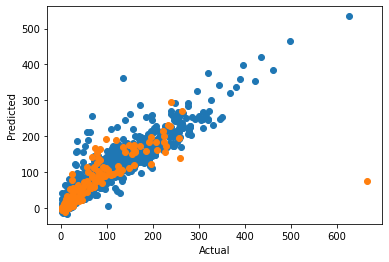

In [ ]:
plt.scatter(y_tr,y_tr_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


The intercept w0 =  485.30505689887326
The coefficients w[1..d]= [ -255.49025829  -464.23912839 -2842.4884017    666.42889131
  -334.5899451    380.84111016  -207.6149388    273.29718922
   736.95804472]
[152.13758047 142.80089321 161.3872441  ...  78.72924142 180.60776829
  20.00068155]
cost: 792.6187836178761 



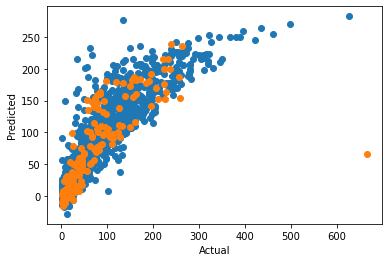

In [ ]:
x = preprocessing.normalize(x, norm='l2')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#x = preprocessing.scale(x)
x_tr = x[0:1300]
y_tr = y[0:1300]
x_val = x[1300:-1]
y_val = y[1300:-1]

regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
print(y_tr_pred)

cost = np.sum((regr.intercept_ + x.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
r2_score = regr.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regr, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7707759825409773
3255.0382092437126
26.329817732357203
Mean cross-validation score: 0.76
K-fold CV average score: 0.76


[2.55966122e-03 4.35995627e-01 2.13305101e-04 6.95374631e-02
 2.13305101e-02 4.47940713e-02 8.95881426e-01 8.53220406e-04
 0.00000000e+00 6.55186555e-06 1.11600110e-03 5.45988795e-07
 1.77992347e-04 5.45988795e-05 1.14657647e-04 2.29315294e-03
 2.18395518e-06 0.00000000e+00 1.90092187e-01 9.30000915e-05
 3.03180298e-02 9.30000915e-03 1.95300192e-02 3.90600384e-01
 3.72000366e-04 0.00000000e+00 4.54990663e-08 1.48326956e-05
 4.54990663e-06 9.55480392e-06 1.91096078e-04 1.81996265e-07
 0.00000000e+00 4.83545877e-03 1.48326956e-03 3.11486608e-03
 6.22973216e-02 5.93307824e-05 0.00000000e+00 4.54990663e-04
 9.55480392e-04 1.91096078e-02 1.81996265e-05 0.00000000e+00
 2.00650882e-03 4.01301765e-02 3.82192157e-05 0.00000000e+00
 8.02603529e-01 7.64384314e-04 0.00000000e+00 7.27985061e-07
 0.00000000e+00 0.00000000e+00]
The intercept w0 =  103505934217998.9
The coefficients w[1..d]= [-9.08836206e+03 -4.87380461e+03 -9.46238819e+04  8.34115671e+03
 -4.12557595e+03  1.51776414e+01 -4.20496903e+

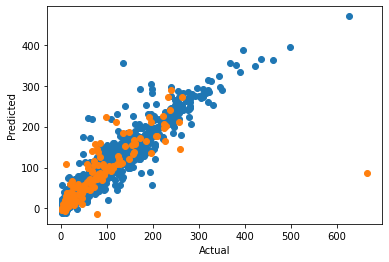

In [ ]:
x = preprocessing.normalize(x, norm='l2')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_trans = transformer.transform(x)
#x = preprocessing.scale(x)
x_tr = x_trans[0:1300]
y_tr = y[0:1300]
x_val = x_trans[1300:-1]
y_val = y[1300:-1]
print(x_tr[0])
regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
func = regr.intercept_ + x_trans.dot(regr.coef_)
cost = np.sum((regr.intercept_ + x_trans.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
r2_score = regr.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regr, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.8980722763161489
2945.4456502270104
21.9517578124375
Mean cross-validation score: 0.84
K-fold CV average score: 0.32


[2.55966122e-03 4.35995627e-01 2.13305101e-04 6.95374631e-02
 2.13305101e-02 4.47940713e-02 8.95881426e-01 8.53220406e-04
 0.00000000e+00 6.55186555e-06 1.11600110e-03 5.45988795e-07
 1.77992347e-04 5.45988795e-05 1.14657647e-04 2.29315294e-03
 2.18395518e-06 0.00000000e+00 1.90092187e-01 9.30000915e-05
 3.03180298e-02 9.30000915e-03 1.95300192e-02 3.90600384e-01
 3.72000366e-04 0.00000000e+00 4.54990663e-08 1.48326956e-05
 4.54990663e-06 9.55480392e-06 1.91096078e-04 1.81996265e-07
 0.00000000e+00 4.83545877e-03 1.48326956e-03 3.11486608e-03
 6.22973216e-02 5.93307824e-05 0.00000000e+00 4.54990663e-04
 9.55480392e-04 1.91096078e-02 1.81996265e-05 0.00000000e+00
 2.00650882e-03 4.01301765e-02 3.82192157e-05 0.00000000e+00
 8.02603529e-01 7.64384314e-04 0.00000000e+00 7.27985061e-07
 0.00000000e+00 0.00000000e+00]
The intercept w0 =  223.47014144908678
The coefficients w[1..d]= [ 2.61329570e+01 -2.10721871e+02 -2.81548891e+00  2.90468584e+02
 -1.93893827e+01  5.67727612e+01  6.12782757e

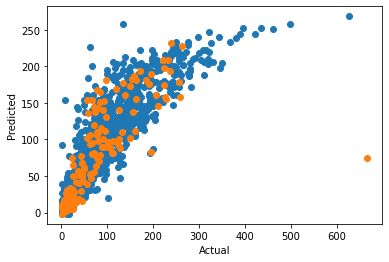

In [ ]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
transformer.fit(x)
x_trans = transformer.transform(x)

x_tr = x_trans[0:1300]
y_tr = y[0:1300]
x_val = x_trans[1300:-1]
y_val = y[1300:-1]
print(x_tr[0])

regr = Ridge(alpha=1)
regr.fit(x_tr, y_tr)

#regr = linear_model.LinearRegression()
#regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
func = regr.intercept_ + x_trans.dot(regr.coef_)
cost = np.sum((regr.intercept_ + x_trans.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
r2_score = regr.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regr, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7745761972128782
3238.4420248007445
25.83828869183816
Mean cross-validation score: 0.77
K-fold CV average score: 0.77


[2.85714286e-03 4.86666667e-01 2.38095238e-04 7.76190476e-02
 2.38095238e-02 5.00000000e-02 1.00000000e+00 9.52380952e-04
 0.00000000e+00 8.16326531e-06 1.39047619e-03 6.80272109e-07
 2.21768707e-04 6.80272109e-05 1.42857143e-04 2.85714286e-03
 2.72108844e-06 0.00000000e+00 2.36844444e-01 1.15873016e-04
 3.77746032e-02 1.15873016e-02 2.43333333e-02 4.86666667e-01
 4.63492063e-04 0.00000000e+00 5.66893424e-08 1.84807256e-05
 5.66893424e-06 1.19047619e-05 2.38095238e-04 2.26757370e-07
 0.00000000e+00 6.02471655e-03 1.84807256e-03 3.88095238e-03
 7.76190476e-02 7.39229025e-05 0.00000000e+00 5.66893424e-04
 1.19047619e-03 2.38095238e-02 2.26757370e-05 0.00000000e+00
 2.50000000e-03 5.00000000e-02 4.76190476e-05 0.00000000e+00
 1.00000000e+00 9.52380952e-04 0.00000000e+00 9.07029478e-07
 0.00000000e+00 0.00000000e+00]
The intercept w0 =  178.09160965908785
The coefficients w[1..d]= [   0.         -165.64188613   -0.          116.83855556    0.
    0.            0.            0.           -0

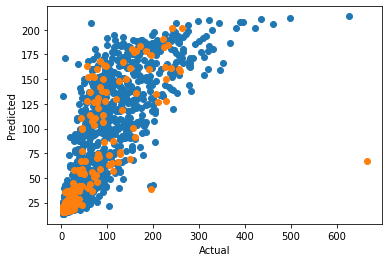

In [ ]:
x = preprocessing.normalize(x, norm='max')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_trans = transformer.transform(x)
x_tr = x_trans[0:1300]
y_tr = y[0:1300]
x_val = x_trans[1300:-1]
y_val = y[1300:-1]
print(x_tr[0])

regr = Lasso(alpha=1)
regr.fit(x_tr, y_tr)

#regr = linear_model.LinearRegression()
#regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
func = regr.intercept_ + x_trans.dot(regr.coef_)
cost = np.sum((regr.intercept_ + x_trans.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


In [ ]:
r2_score = regr.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regr, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.6502209666888905
3839.642079913077
32.58113226809097
Mean cross-validation score: 0.65
K-fold CV average score: 0.65


In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
#from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error 


In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=9)
#principalComponents = pca.fit_transform(x)

x_tr = x[0:1300]
y_tr = y[0:1300]
x_val = x[1300:-1]
y_val = y[1300:-1]
#x_tr = pca.transform(x_tr)
#y_tr = pca.transform(y_tr)
#x_val = pca.transform(x_val)
#y_val = pca.transform(y_val)



0.8576109445431928
757.952392934573
18.966568906419045
Mean cross-validation score: 0.78
K-fold CV average score: 0.78


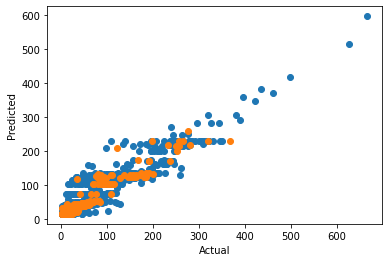

In [ ]:
am = AdaBoostRegressor(learning_rate = 0.1)
modelam = am.fit(x_tr, y_tr)

y_tr_pred = am.predict(x_tr)
y_val_pred = am.predict(x_val)

r2_score = am.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(am, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(am, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.687931783194768
4066.672778001598
35.74895314929677
Mean cross-validation score: 0.59
K-fold CV average score: 0.60


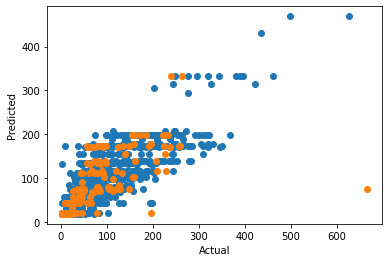

In [ ]:
am = AdaBoostRegressor(learning_rate = 0.3)
modelam = am.fit(x_tr, y_tr)

y_tr_pred = am.predict(x_tr)
y_val_pred = am.predict(x_val)

r2_score = am.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(am, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(am, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7732393168057798
1407.1115947296917
32.0698754047115
Mean cross-validation score: 0.64
K-fold CV average score: 0.70


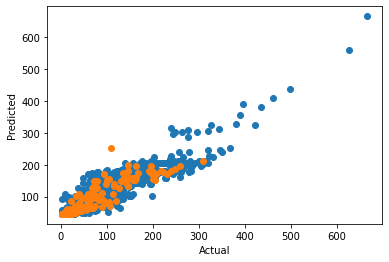

In [ ]:
am = AdaBoostRegressor(learning_rate = 0.7)
modelam = am.fit(x_tr, y_tr)

y_tr_pred = am.predict(x_tr)
y_val_pred = am.predict(x_val)

r2_score = am.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(gm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7462289576184642
1653.1794638819442
35.10366220424517
Mean cross-validation score: 0.65
K-fold CV average score: 0.67


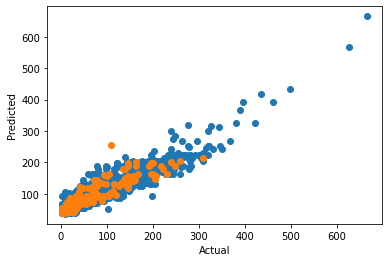

In [ ]:
am = AdaBoostRegressor(learning_rate = 1.0)
modelam = am.fit(x_tr, y_tr)

y_tr_pred = am.predict(x_tr)
y_val_pred = am.predict(x_val)

r2_score = am.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(gm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.9512956909868009
757.861606641028
16.127472994111205
Mean cross-validation score: 0.80
K-fold CV average score: 0.81


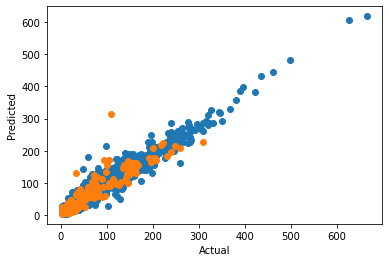

In [ ]:
gm = GradientBoostingRegressor(learning_rate = 0.1)
modelgm = gm.fit(x_tr, y_tr)

y_tr_pred = gm.predict(x_tr)
y_val_pred = gm.predict(x_val)
                        
r2_score = gm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(gm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.978320123808456
694.4005167525114
17.250472236871445
Mean cross-validation score: 0.78
K-fold CV average score: 0.78


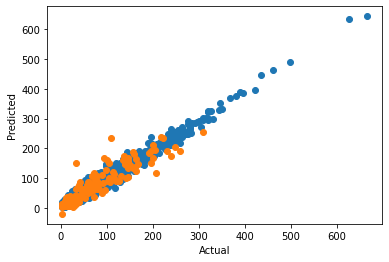

In [ ]:
gm = GradientBoostingRegressor(learning_rate = 0.3)
modelgm = gm.fit(x_tr, y_tr)

y_tr_pred = gm.predict(x_tr)
y_val_pred = gm.predict(x_val)
                        
r2_score = gm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(gm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.9933340171077102
899.1898639076866
19.542188655666816
Mean cross-validation score: 0.74
K-fold CV average score: 0.75


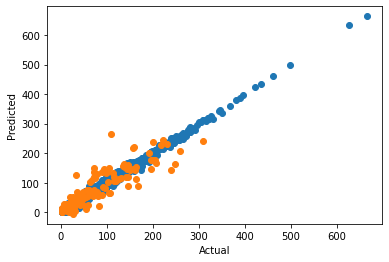

In [ ]:
gm = GradientBoostingRegressor(learning_rate = 0.7)
modelgm = gm.fit(x_tr, y_tr)

y_tr_pred = gm.predict(x_tr)
y_val_pred = gm.predict(x_val)
                        
r2_score = gm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(gm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.9949804878820294
1540.7746095570342
24.005122169758074
Mean cross-validation score: 0.66
K-fold CV average score: 0.70


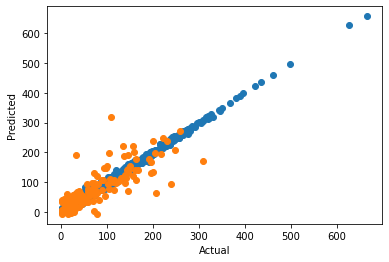

In [ ]:
gm = GradientBoostingRegressor(learning_rate = 1.0)
modelgm = gm.fit(x_tr, y_tr)

y_tr_pred = gm.predict(x_tr)
y_val_pred = gm.predict(x_val)
                        
r2_score = gm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(gm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.588805623280996
1600.5513522472468
25.573370609701648
[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:47] WARNING: /workspace/src/objective/regression

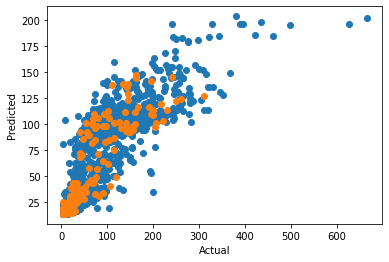

In [ ]:
xgm = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 15)
modelxgm = xgm.fit(x_tr, y_tr)

y_tr_pred = xgm.predict(x_tr)
y_val_pred = xgm.predict(x_val)
                        
r2_score = xgm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(xgm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8272653380362587
1014.7421431746055
21.931921787084114
[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:53] WARNING: /workspace/src/objective/regressio

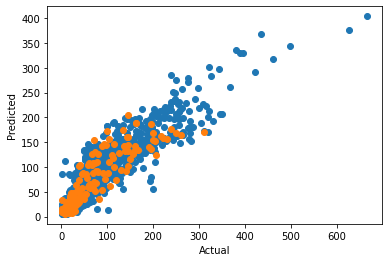

In [ ]:
xgm = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 3, alpha = 10, n_estimators = 15)
modelxgm = xgm.fit(x_tr, y_tr)

y_tr_pred = xgm.predict(x_tr)
y_val_pred = xgm.predict(x_val)
                        
r2_score = xgm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(xgm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.900447658133759
978.6583833178777
21.145049272746814
[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:12] WARNING: /workspace/src/objective/regression_

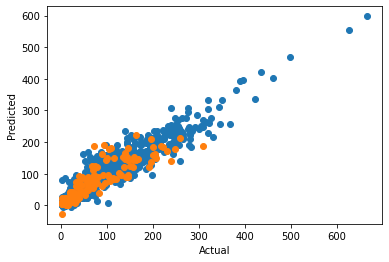

In [ ]:
xgm = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.7,
                max_depth = 3, alpha = 10, n_estimators = 15)
modelxgm = xgm.fit(x_tr, y_tr)

y_tr_pred = xgm.predict(x_tr)
y_val_pred = xgm.predict(x_val)
                        
r2_score = xgm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(xgm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9011886561934528
1174.2418874139307
23.960085717112793
[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: /workspace/src/objective/regressio

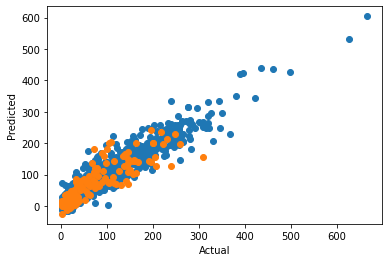

In [ ]:
xgm = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1.0,
                max_depth = 3, alpha = 10, n_estimators = 15)
modelxgm = xgm.fit(x_tr, y_tr)

y_tr_pred = xgm.predict(x_tr)
y_val_pred = xgm.predict(x_val)
                        
r2_score = xgm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(xgm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.6909016403257279
954.8663159634037
21.488098149687765
Mean cross-validation score: 0.57
K-fold CV average score: 0.63


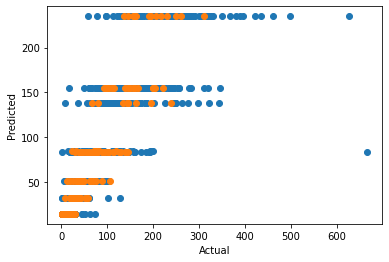

In [ ]:
rm = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)  
modelrm = rm.fit(x_tr,y_tr)

y_tr_pred = rm.predict(x_tr)
y_val_pred = rm.predict(x_val)
                        
r2_score = rm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(rm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.6909016403257279
954.8663159634037
21.488098149687765
Mean cross-validation score: 0.57
K-fold CV average score: 0.58


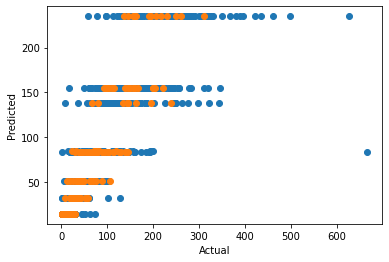

In [ ]:
rm = DecisionTreeRegressor(criterion='friedman_mse',     # Initialize and fit regressor
                             max_depth=3)  
modelrm = rm.fit(x_tr,y_tr)

y_tr_pred = rm.predict(x_tr)
y_val_pred = rm.predict(x_val)
                        
r2_score = rm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(rm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.677536943841924
986.3335069460556
21.957291666687503
Mean cross-validation score: 0.64
K-fold CV average score: 0.64


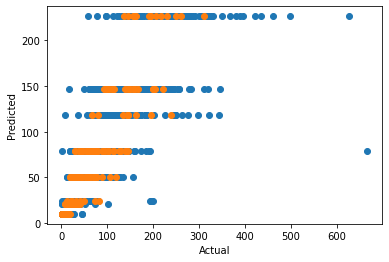

In [ ]:
rm = DecisionTreeRegressor(criterion='mae',     # Initialize and fit regressor
                             max_depth=3)  
modelrm = rm.fit(x_tr,y_tr)

y_tr_pred = rm.predict(x_tr)
y_val_pred = rm.predict(x_val)
                        
r2_score = rm.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(rm, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rm, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.44424230327433123
1917.8087805772589
29.297323817470385
Mean cross-validation score: 0.44
K-fold CV average score: 0.44


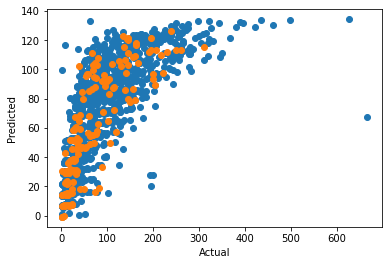

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')

regressor.fit(x_tr,y_tr)

y_tr_pred = regressor.predict(x_tr)
y_val_pred = regressor.predict(x_val)
                        
r2_score = regressor.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regressor, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regressor, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


0.49179834291144897
1539.6005235888701
25.681330953227313
Mean cross-validation score: 0.50
K-fold CV average score: 0.49


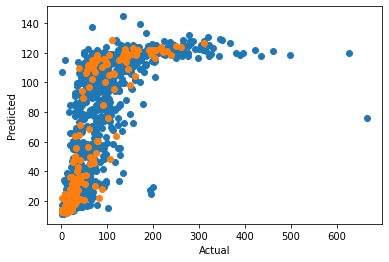

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='poly')

regressor.fit(x_tr,y_tr)

y_tr_pred = regressor.predict(x_tr)
y_val_pred = regressor.predict(x_val)
                        
r2_score = regressor.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regressor, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regressor, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.4704349044757846
1746.4758297859275
27.456218233093058
Mean cross-validation score: 0.47
K-fold CV average score: 0.47


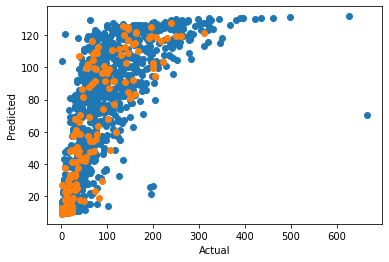

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')

regressor.fit(x_tr,y_tr)

y_tr_pred = regressor.predict(x_tr)
y_val_pred = regressor.predict(x_val)
                        
r2_score = regressor.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regressor, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regressor, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.41461735831724544
4476.051744417073
39.623442119257284
Mean cross-validation score: 0.47
K-fold CV average score: 0.47


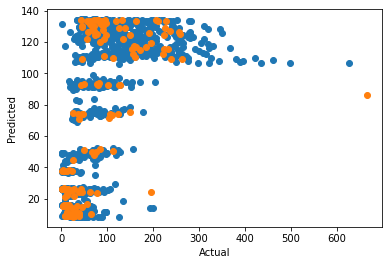

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='sigmoid')

regressor.fit(x_tr,y_tr)

y_tr_pred = regressor.predict(x_tr)
y_val_pred = regressor.predict(x_val)
                        
r2_score = regressor.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regressor, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regressor, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7837378159609655
918.8714723073705
21.32890977220573
Mean cross-validation score: 0.73
K-fold CV average score: 0.71


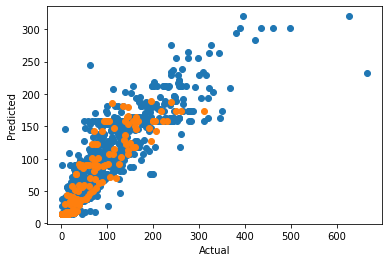

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 15, criterion='mse', max_depth=3,max_features='auto', random_state=1)

RF.fit(x_tr,y_tr)

RF.fit(x_tr,y_tr)

y_tr_pred = RF.predict(x_tr)
y_val_pred = RF.predict(x_val)
                        
r2_score = RF.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(RF, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(RF, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7288500130900064
1022.8470777915669
22.290772063552723
Mean cross-validation score: 0.69
K-fold CV average score: 0.69


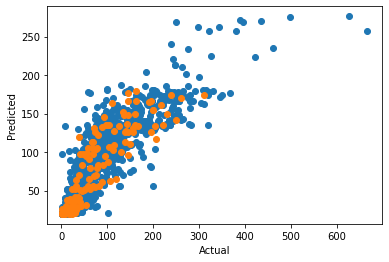

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 15, criterion='mse', max_depth=3,max_features='sqrt', random_state=1)

RF.fit(x_tr,y_tr)

RF.fit(x_tr,y_tr)

y_tr_pred = RF.predict(x_tr)
y_val_pred = RF.predict(x_val)
                        
r2_score = RF.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(RF, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(RF, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

0.7288500130900064
1022.8470777915669
22.290772063552723
Mean cross-validation score: 0.69
K-fold CV average score: 0.67


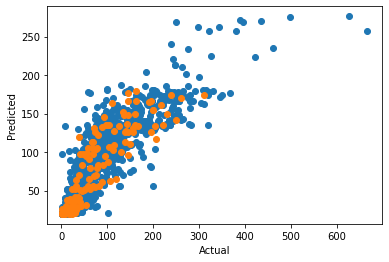

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 15, criterion='mse', max_features='log2', max_depth=3, random_state=1)

RF.fit(x_tr,y_tr)

RF.fit(x_tr,y_tr)

y_tr_pred = RF.predict(x_tr)
y_val_pred = RF.predict(x_val)
                        
r2_score = RF.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(RF, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(RF, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-0.18819525197164833
5053.1136415500105
50.52172226283813


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean cross-validation score: -0.25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


K-fold CV average score: -0.25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


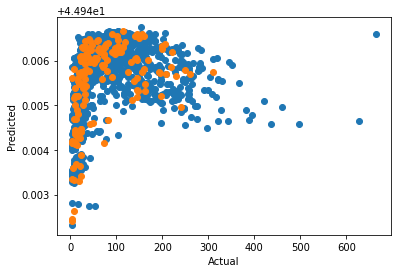

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='tanh', max_iter=200, solver='adam', learning_rate='adaptive', alpha=1e-5,hidden_layer_sizes=(30, 30, 30 ), random_state=42)

mlp.fit(x_tr,y_tr)
y_tr_pred = mlp.predict(x_tr)
y_val_pred = mlp.predict(x_val)
                        
r2_score =mlp.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(mlp, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(mlp, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8695924195088358
508.0934318512467
15.39286049595798


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Mean cross-validation score: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

K-fold CV average score: 0.81


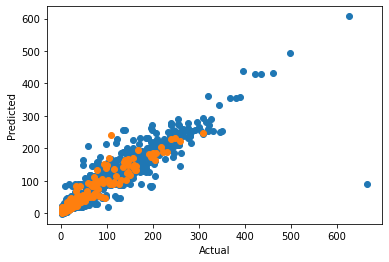

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='tanh', max_iter=200, solver='lbfgs', learning_rate='adaptive', alpha=1e-5,hidden_layer_sizes=(30, 30, 30 ), random_state=42)

mlp.fit(x_tr,y_tr)
y_tr_pred = mlp.predict(x_tr)
y_val_pred = mlp.predict(x_val)
                        
r2_score =mlp.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(mlp, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(mlp, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

1.0632881227712332e-06
4372.542364207822
55.16517628525295
Mean cross-validation score: -0.01
K-fold CV average score: -0.01


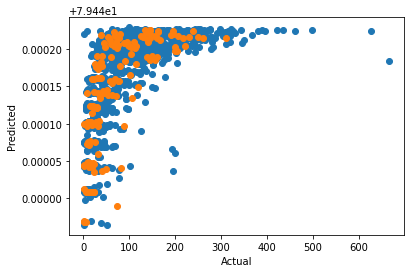

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='tanh', max_iter=200, solver='sgd', learning_rate='adaptive', alpha=1e-5,hidden_layer_sizes=(30, 30, 30 ), random_state=42)

mlp.fit(x_tr,y_tr)
y_tr_pred = mlp.predict(x_tr)
y_val_pred = mlp.predict(x_val)
                        
r2_score =mlp.score(x_tr,y_tr)
print(r2_score)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val,y_val_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,y_val_pred))

plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(mlp, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(mlp, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(mlp, x_tr, y_tr,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -0.01


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(mlp, x_tr, y_tr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: -0.01
